# Decision Tree

### Importing Libraries

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset loading and exploratory data analysis

Loading Dataset

In [24]:
diabetes_df = pd.read_csv('wine.csv')
diabetes_df.head() # Preview the dataset
diabetes_df.shape # Number of instances and variables

(178, 14)

Renaming Colunms

In [25]:
col_names = ['wine','alcohol','malicacid','ash','acl','mg','phenols','flavanoids','nonflavanoids','proanth','colorint','hue','od', 'proline']
diabetes_df.columns = col_names # Rename column names

Summary of Dataset

In [26]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wine           178 non-null    int64  
 1   alcohol        178 non-null    float64
 2   malicacid      178 non-null    float64
 3   ash            178 non-null    float64
 4   acl            178 non-null    float64
 5   mg             178 non-null    int64  
 6   phenols        178 non-null    float64
 7   flavanoids     178 non-null    float64
 8   nonflavanoids  178 non-null    float64
 9   proanth        178 non-null    float64
 10  colorint       178 non-null    float64
 11  hue            178 non-null    float64
 12  od             178 non-null    float64
 13  proline        178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Frequency distributions of values in variables

In [27]:
for col in col_names:
  print(diabetes_df[col].value_counts())

wine
2    71
1    59
3    48
Name: count, dtype: int64
alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.00    3
        ..
12.82    1
12.20    1
14.16    1
13.27    1
14.13    1
Name: count, Length: 126, dtype: int64
malicacid
1.73    7
1.81    4
1.67    4
1.35    3
1.90    3
       ..
2.51    1
5.65    1
3.91    1
4.28    1
4.10    1
Name: count, Length: 133, dtype: int64
ash
2.30    7
2.28    7
2.32    6
2.36    6
2.70    6
       ..
2.15    1
2.75    1
2.69    1
2.86    1
2.37    1
Name: count, Length: 79, dtype: int64
acl
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
20.8     1
26.5     1
23.5     1
25.5     1
27.0     1
Name: count, Length: 63, dtype: int64
mg
88     13
86     11
101     9
98      9
96      8
102     7
85      6
94      6
112     6
89      5
97      5
80      5
103     5
92      5
90      4
108     4
106     4
107     4
120     3
116     3
118     3
95      3
100     3
87      3
110     3
84      3
111     3
78      3
104     3
93      2


Exploring target variable

In [49]:
diabetes_df['wine'].value_counts()

,count
wine,
2,71
1,59
3,48


Checking missing values in variables

In [50]:
diabetes_df.isnull().sum()

,0
wine,0
alcohol,0
malicacid,0
ash,0
acl,0
mg,0
phenols,0
flavanoids,0
nonflavanoids,0
proanth,0


### Defining feature vector and target variable

In [51]:
# This separates inputs (x) from outputs (y). This is essential step in supervised learning.
X = diabetes_df.drop(['wine'], axis=1) # All colunms exceot  'label'
y = diabetes_df['wine'] # Target: has diabetes or not

### Splitting Data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
# Here random_state=1, ensures the same split every time
X_train.shape, X_test.shape # Shapes of X_train and X_test

((133, 13), (45, 13))

### Feature engineering: encoding categorical variables

In [32]:
X_train.dtypes # Check data types in X_train

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=X.columns.tolist())
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Since decision tree can handle the numeric input, this step ensures any non-numeric colunms (if any) are encoded as numbers.
# But in this dataset, all the features are numeric, so this is more precautionary.

ModuleNotFoundError: No module named 'category_encoders'

### Building decision tree classifier with the Gini index criterion

In [53]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

### Predicting results for the test set

In [54]:
y_pred = clf_gini.predict(X_test)

Evaluating model

In [55]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Confusion Matrix

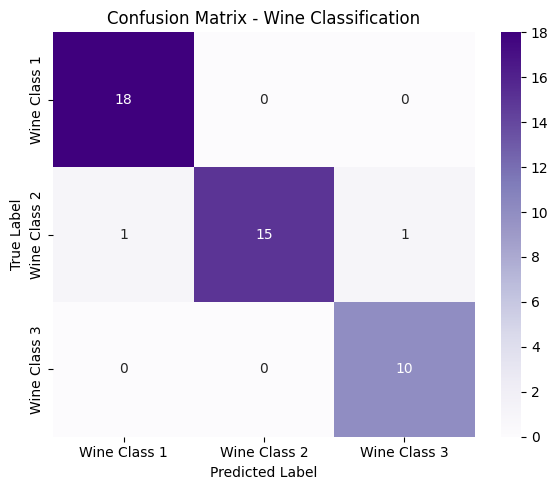

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Class names (Wine classes 1, 2, and 3)
class_names = ["Wine Class 1", "Wine Class 2", "Wine Class 3"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Wine Classification")
plt.tight_layout()
plt.show()

### Optimizing Decision Tree Performance

In [57]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best')

### Vitualize the decision tree

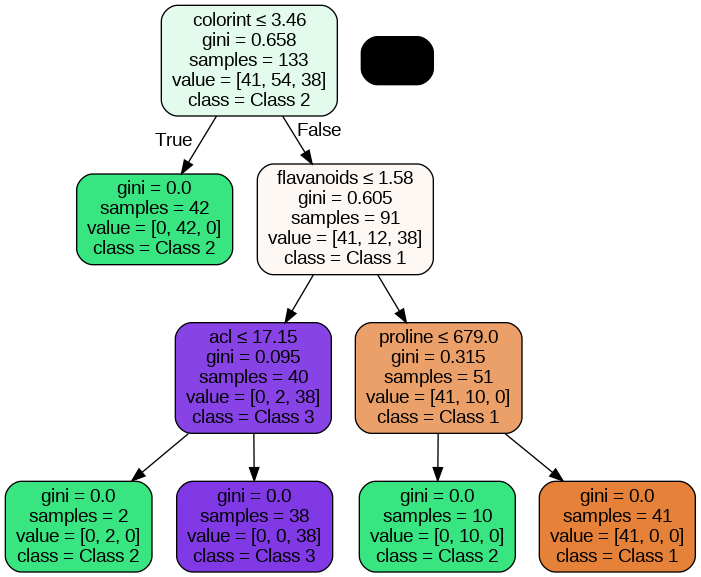

In [58]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Assuming your classifier is called clf_wine and feature DataFrame is X
dot_data = StringIO()
export_graphviz(clf_gini,
    out_file=dot_data,
    filled=True,               # Fill nodes with color
    rounded=True,              # Rounded node edges
    special_characters=True,   # Handle special characters
    feature_names=X.columns,   # Wine feature names
    class_names=['Class 1', 'Class 2', 'Class 3'])  # Wine class labels

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save and display the PNG image
graph.write_png('wine_tree.png')
Image(graph.create_png())

### Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Precision - Among the predictions made for a given class, how many are correct?
# Recall - Out of all the actual instances of a class, how many were correctly predicted?
# F1-Score - Harmonic mean of precision and Recall
# Support - Actual number of occurances of the class in your test dataset

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



## Decision Tree - Using Entropy

In [41]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_entropy.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Predicting results for the test set

In [45]:
y_pred_entropy = clf_entropy.predict(X_test)

### Evaluating model

In [43]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Confusion Matrix

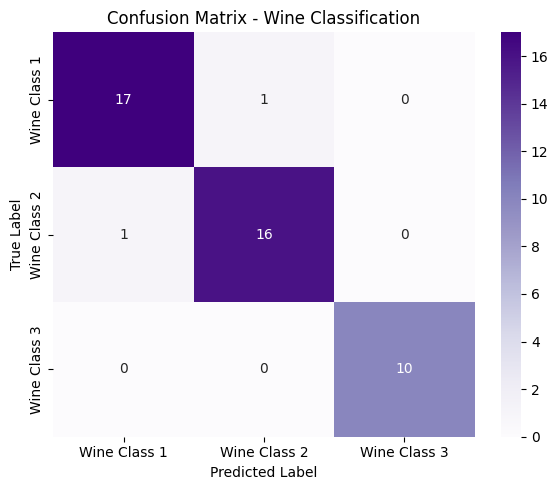

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_entropy)

# Class names (Wine classes 1, 2, and 3)
class_names = ["Wine Class 1", "Wine Class 2", "Wine Class 3"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Wine Classification")
plt.tight_layout()
plt.show()

### Vitualize the decision tree

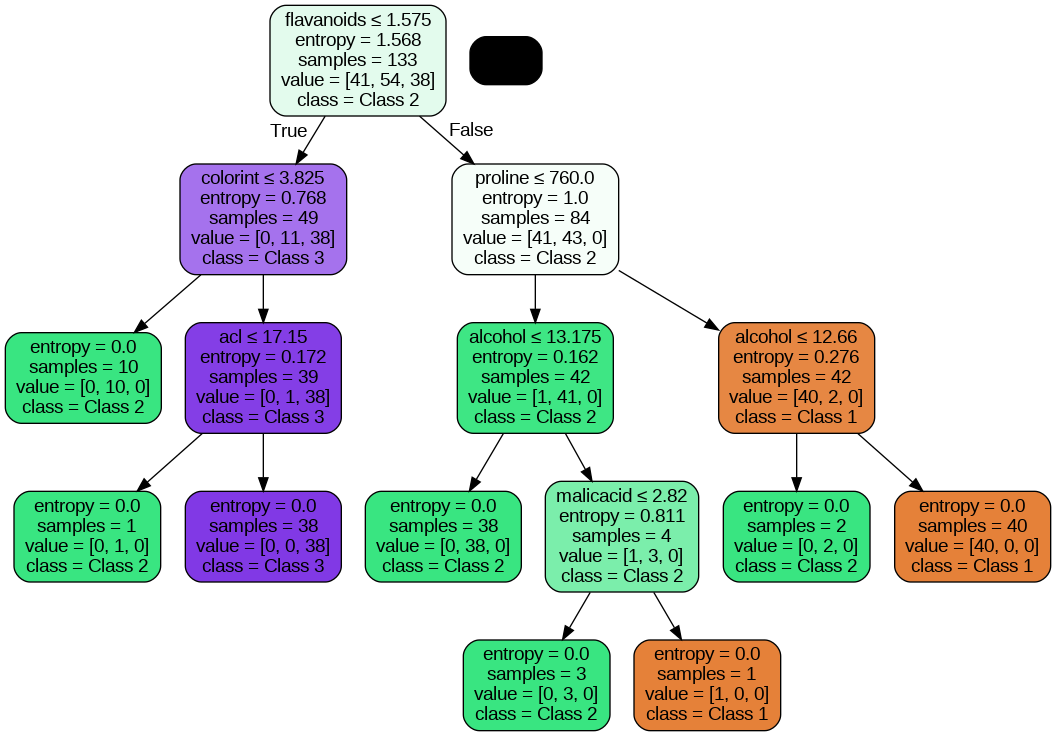

In [47]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Assuming your classifier is called clf_wine and feature DataFrame is X
dot_data = StringIO()
export_graphviz(clf_entropy,
    out_file=dot_data,
    filled=True,               # Fill nodes with color
    rounded=True,              # Rounded node edges
    special_characters=True,   # Handle special characters
    feature_names=X.columns,   # Wine feature names
    class_names=['Class 1', 'Class 2', 'Class 3'])  # Wine class labels

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save and display the PNG image
graph.write_png('wine_tree.png')
Image(graph.create_png())

### Classification Report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_entropy))

# Precision - Among the predictions made for a given class, how many are correct?
# Recall - Out of all the actual instances of a class, how many were correctly predicted?
# F1-Score - Harmonic mean of precision and Recall
# Support - Actual number of occurances of the class in your test dataset

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17
           3       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# kNN

✅ Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
✅ kNN Accuracy: 0.9333333333333333
✅ Runtime: 0.4875 seconds
✅ Classification Report:
               precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.83      0.91        18
           3       0.92      1.00      0.96        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



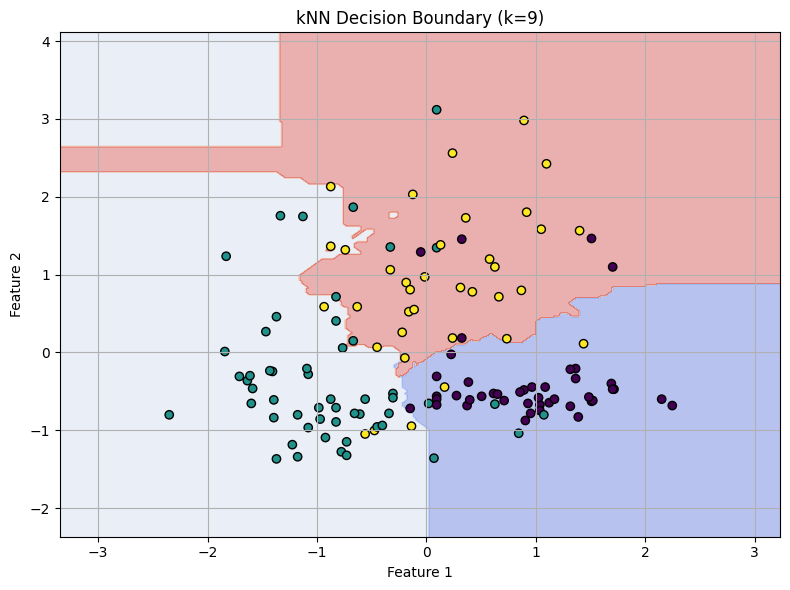

In [67]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Step 2: Load the Wine dataset
df = pd.read_csv("wine.csv")

# Step 3: Define features and target
X = df.drop('Wine', axis=1)
y = df['Wine']

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Feature scaling (essential for distance-based algorithms like kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Hyperparameter tuning using GridSearchCV (k + distance metric)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 12],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Record runtime
start_time = time.time()
grid.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Step 7: Best model & prediction
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Step 8: Evaluation
print("✅ Best Parameters:", grid.best_params_)
print("✅ kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("✅ Runtime: %.4f seconds" % runtime)
print("✅ Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 9: Decision Boundary (using first 2 features only)
X2_train = X_train_scaled[:, :2]  # Only first two features for 2D plotting
X2_test = X_test_scaled[:, :2]

knn2 = KNeighborsClassifier(
    n_neighbors=grid.best_params_['n_neighbors'],
    metric=grid.best_params_['metric']
)
knn2.fit(X2_train, y_train)

# Create meshgrid
h = 0.02
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict over meshgrid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title(f'kNN Decision Boundary (k={grid.best_params_["n_neighbors"]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()
